## Titanic Prediction Set

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


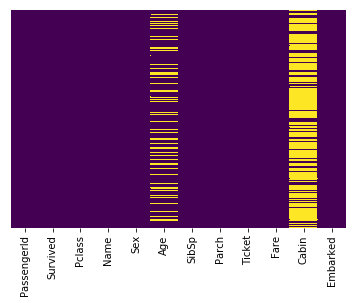

In [5]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

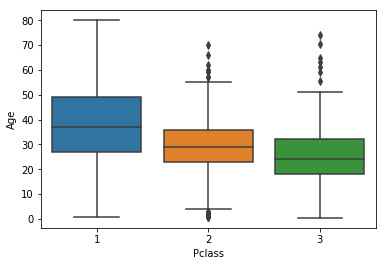

In [6]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [7]:
def tukka(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else: 
            return 24
    else:
        return age

In [8]:
train['Age'] = train[['Age', 'Pclass']].apply(tukka, axis = 1)

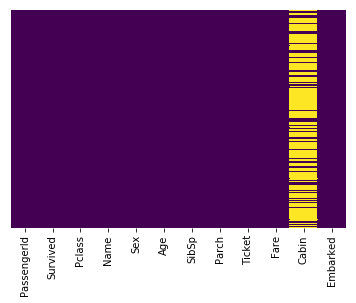

In [9]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
train.drop('Cabin', axis = 1, inplace = True)

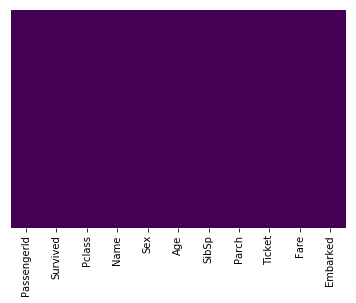

In [11]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [12]:
train.dropna(inplace = True)

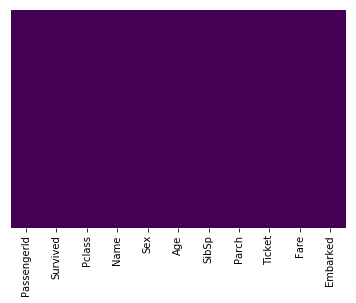

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
train.drop(['Name', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
temp = pd.get_dummies(train['Sex'])

In [17]:
temp.drop('male', inplace = True, axis = 1)

In [18]:
train = pd.concat([train, temp], axis = 1)

In [19]:
train.drop('Sex', axis = 1, inplace =True)

In [20]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0


In [21]:
temp = pd.get_dummies(train['Embarked'])

In [22]:
temp

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [23]:
temp.drop('C', axis = 1, inplace = True)

In [24]:
temp.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
train = pd.concat([train, temp], axis = 1)
train.drop('Embarked', axis = 1, inplace = True)

In [26]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [27]:
temp = pd.get_dummies(train['Pclass'], drop_first = True)

In [28]:
train = pd.concat([train, temp], axis = 1)

In [29]:
train.drop('Pclass', inplace = True, axis = 1)

In [30]:
train.head()

,Survived,Age,SibSp,Parch,Fare,female,Q,S,2,3
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1


In [31]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [32]:
x.head()

,Age,SibSp,Parch,Fare,female,Q,S,2,3
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0
2,26.0,0,0,7.9250,1,0,1,0,1
3,35.0,1,0,53.1000,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1


In [33]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train, y_train)

/home/mayank/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       184
           1       0.80      0.73      0.76       110

   micro avg       0.83      0.83      0.83       294
   macro avg       0.82      0.81      0.81       294
weighted avg       0.83      0.83      0.83       294



In [42]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0])

In [43]:
predictions.shape

(294,)

In [44]:
X_test.values

array([[28.,  0.,  0., ...,  1.,  0.,  1.],
       [14.,  1.,  2., ...,  1.,  0.,  0.],
       [14.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  0.,  2., ...,  0.,  0.,  1.],
       [22.,  0.,  0., ...,  1.,  0.,  1.],
       [56.,  0.,  0., ...,  0.,  0.,  0.]])

In [45]:
X_test.shape

(294, 9)

In [46]:
test = pd.read_csv("titanic_test.csv")

In [47]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [48]:
test['Age'] = test[['Age', 'Pclass']].apply(tukka, axis = 1)

In [49]:
test.drop('Cabin', axis = 1, inplace = True)

In [50]:
test.dropna(inplace = True)

In [51]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [52]:
temp = pd.get_dummies(test['Sex'])

In [53]:
temp.drop('male', inplace = True, axis = 1)

In [54]:
test = pd.concat([temp, test], axis = 1)

In [55]:
IDs = test['PassengerId']

In [56]:
test.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], inplace = True, axis = 1)

In [57]:
test.head()

,female,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,34.5,0,0,7.8292,Q
1,1,3,47.0,1,0,7.0000,S
2,0,2,62.0,0,0,9.6875,Q
3,0,3,27.0,0,0,8.6625,S
4,1,3,22.0,1,1,12.2875,S


In [58]:
temp1 = pd.get_dummies(test['Pclass'], drop_first = True);
temp2 = pd.get_dummies(test['Embarked'], drop_first = True);

In [59]:
test = pd.concat([temp1, temp2, test], axis = 1)

In [60]:
test.head()


,2,3,Q,S,female,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,0,0,3,34.5,0,0,7.8292,Q
1,0,1,0,1,1,3,47.0,1,0,7.0000,S
2,1,0,1,0,0,2,62.0,0,0,9.6875,Q
3,0,1,0,1,0,3,27.0,0,0,8.6625,S
4,0,1,0,1,1,3,22.0,1,1,12.2875,S


In [61]:
test.drop(['Pclass', 'Embarked'], inplace = True, axis = 1)

In [62]:
test.head()

,2,3,Q,S,female,Age,SibSp,Parch,Fare
0,0,1,1,0,0,34.5,0,0,7.8292
1,0,1,0,1,1,47.0,1,0,7.0000
2,1,0,1,0,0,62.0,0,0,9.6875
3,0,1,0,1,0,27.0,0,0,8.6625
4,0,1,0,1,1,22.0,1,1,12.2875


In [63]:
colums = test.columns.tolist()

In [64]:
colums

[2, 3, 'Q', 'S', 'female', 'Age', 'SibSp', 'Parch', 'Fare']

In [65]:

colums = ['Age', 'SibSp', 'Parch', 'Fare', 'female', 'Q', 'S', 2, 3]

In [66]:
test = test[colums]

In [67]:
test.values.shape

(417, 9)

In [68]:
tempres = logmodel.predict(test)

In [69]:
tempres.shape

(417,)

In [70]:
res = pd.DataFrame(tempres, columns=['Survived'])

In [71]:
result = pd.concat([IDs, res], axis = 1)

In [72]:
result.dtypes

PassengerId    float64
Survived       float64
dtype: object

In [73]:
result = result.astype(object)

In [74]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [75]:
result.to_csv("result.csv")

## 75.119 percent accuracy achieved on test set.